# Predicting Car Prices

In this project, we use the fundamentals of Machine Learning to predict a car's market price based on its attributes. More precisely, we will use the k-nearest neighbors algorithm. 

We will work with a data set containning information about different types of car. For each of these types we look at atributes such as motor's displacement, car's weight, the miles per gallon, how fast the car accelerates, etc.

Let us first use Pandas to open the data set.

In [1]:
import pandas as pd
import numpy as np
cars=pd.read_csv('imports-85.data')
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It can be seen that the column names do not match the ones in the dataset's documentation

https://archive.ics.uci.edu/ml/datasets/automobile

So we need to change the column names

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Data Cleaning

We are interested in numeric columns only. Thus we remove the others.

In [3]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 
                'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars=cars[numeric_cols]
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


As above, the column 'normalized-losses' contains the missing values '?' at least in the first 3 rows. These values need to be replaced to numpy.nan missing value. We also replace all of these missing values in the whole data frame.

In [4]:
cars=cars.replace('?',np.nan)
cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


This column now need to be converted to numeric types. So that we can count the number of rows in the column 'normalized-looses' as well as other columns which contains a missing value.

In [5]:
cars=cars.astype('float')
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As we can see, the column 'normalized-losses' has 41 missing values. So the best way is to delete this column. For the other columns 'bore', 'stroke', 'horsepower', 'peak-rpm' and 'price', we keep them since there are not so many missing values. In stead, we can either replace the missing values by the average values of the columns or remove the rows containning these missing values. 

Since our goal is to predict the price, the missing values in the 'price' column should be removed. The other missing values in other columns should then be replaced by the mean values of the columns.

In [6]:
del cars['normalized-losses']

cars=cars.dropna(subset=['price'])
cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                4
stroke              4
compression-rate    0
horsepower          2
peak-rpm            2
city-mpg            0
highway-mpg         0
price               0
dtype: int64

In [7]:
cars=cars.fillna(cars.mean())

cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

So there is no more missing value in the data frame. Next step is to normalize all the numeric values except in the 'price' column so that they lie between 0 and 1. 

In [8]:
price_col = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = price_col
cars

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.655977,0.711940,0.735043,0.641667,0.567882,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.655977,0.711940,0.726496,0.641667,0.605508,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.655977,0.711940,0.735043,0.641667,0.591156,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.655977,0.711940,0.735043,0.641667,0.670675,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


# Univariate k-Nearest Neighbors Algorithm 

Let us start with some uinivariate k-nearest neighbors models in order to understand better the features. We will creat a function for more convenience.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    train_df=df.iloc[:140] # 70% of the rows
    test_df=df.iloc[140:]  # 30% of the rows
    knn=KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions=knn.predict(test_df[[train_col]])
    mse=mean_squared_error(test_df[target_col], predictions)
    rmse=np.sqrt(mse)
    return rmse

rmse_dict={}
train_cols=cars.columns.drop('price')

for train_col in train_cols:
    target_col='price'
    rmse_dict[train_col]=knn_train_test(train_col, target_col, cars)
rmse_dict 
    

{'wheel-base': 6091.928498821543,
 'length': 6526.393714956442,
 'width': 4219.397167726261,
 'height': 7138.017681883763,
 'curb-weight': 2409.7067689100986,
 'bore': 9553.125238662675,
 'stroke': 8324.713399841954,
 'compression-rate': 6528.751837782185,
 'horsepower': 3765.3602310414067,
 'peak-rpm': 6373.895683046645,
 'city-mpg': 3417.337064603776,
 'highway-mpg': 2972.6760779241145}

To see the best column to make the prediction, we re-arrange rmse_dict in the ascending order by sort_values method. 

In [10]:
rmse_df=pd.Series(rmse_dict)
rmse_df.sort_values()

curb-weight         2409.706769
highway-mpg         2972.676078
city-mpg            3417.337065
horsepower          3765.360231
width               4219.397168
wheel-base          6091.928499
peak-rpm            6373.895683
length              6526.393715
compression-rate    6528.751838
height              7138.017682
stroke              8324.713400
bore                9553.125239
dtype: float64

Thus the best column is 'curb-weight'. Note that this result applies to the defaut case when k=5. Let us define a new function where k is vary.

In [11]:
def knn_train_test_modified(train_col, target_col, df, k):
    train_df=df.iloc[:140] # 70% of the rows
    test_df=df.iloc[140:]  # 30% of the rows
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions=knn.predict(test_df[[train_col]])
    mse=mean_squared_error(test_df[target_col], predictions)
    rmse=np.sqrt(mse)
    return rmse

train_cols=cars.columns.drop('price')
rmse_results={}

for train_col in train_cols:
    target_col='price'
    k_values=[1,3,5,7,9]
    k_dict={}
    for k in k_values:
        k_dict[k]=knn_train_test_modified(train_col, target_col, cars, k)
    rmse_results[train_col]=k_dict
rmse_results


{'wheel-base': {1: 4770.113568775527,
  3: 6438.780125360102,
  5: 6091.928498821543,
  7: 5721.442536800226,
  9: 5070.1483692428965},
 'length': {1: 6164.6753348093325,
  3: 5465.783892138031,
  5: 6526.393714956442,
  7: 5808.85938286306,
  9: 4829.601062928393},
 'width': {1: 8562.477939184217,
  3: 4290.905128465744,
  5: 4219.397167726261,
  7: 3596.3716942215046,
  9: 2987.666723095101},
 'height': {1: 11087.198913796863,
  3: 10837.709924182718,
  5: 7138.017681883763,
  7: 6451.530758676104,
  9: 5456.508724582511},
 'curb-weight': {1: 3579.623624779841,
  3: 2444.224673594698,
  5: 2409.7067689100986,
  7: 2543.759838590683,
  9: 2659.87575932591},
 'bore': {1: 7115.3183885537965,
  3: 10131.909298487964,
  5: 9553.125238662675,
  7: 8069.3123269733605,
  9: 6519.827707319491},
 'stroke': {1: 11619.510464138733,
  3: 11667.743247985478,
  5: 8324.713399841954,
  7: 6380.536653470697,
  9: 6962.565321307294},
 'compression-rate': {1: 5732.042893917047,
  3: 4645.891477545438,


# Visualization

To make it easy to understand, let us visualize the results by using line chart and scatter plot.

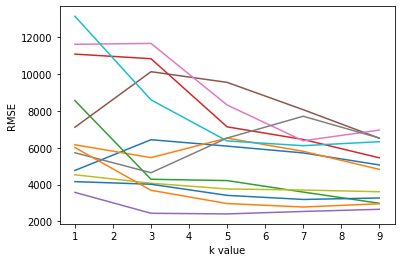

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

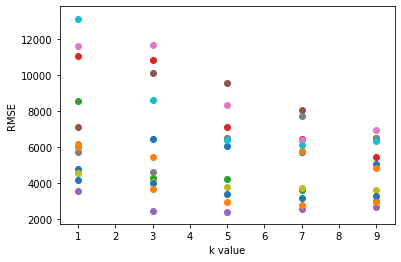

In [13]:
for k,v in rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

It seems that the best predictions obtained when k=3 or 5 and when we consider the feature 'curb-weight'. Look closer at this column one can conclude that k=5 is the best choice with rmse=2409.7. We have been familiar with the data. Now let us move to considering multiple features.

# Multivariate k-Nearest Neighbors Algorithm

From previous step, the best 5 features corresponding to the visualizations are 'curb-weight', 'city-mpg', 'highway-mpg', 'horsepower', 'width'. Let us calculate the average values of their rmse in order to confirm this.

In [14]:
rmse_avg={}
for col in rmse_results:
    mean_col=np.mean(list(rmse_results[col].values()))
    rmse_avg[col]=mean_col
pd.Series(rmse_avg).sort_values()    

curb-weight         2727.438133
city-mpg            3614.153836
highway-mpg         3684.937741
horsepower          3939.415508
width               4731.363731
wheel-base          5618.482620
length              5759.062678
compression-rate    6230.017624
peak-rpm            8113.030610
height              8194.193201
bore                8277.898592
stroke              8991.013817
dtype: float64

This confirms the assertation above. We now use the k-nearest neighbors algorithm for the default case k=5 but with 2,3,4,5 best features respectively. One need to modify a bit the function defined at the beginning.

In [15]:
def knn_train_test(train_cols, target_col, df):
    train_df=df.iloc[:140] # 70% of the rows
    test_df=df.iloc[140:]  # 30% of the rows
    knn=KNeighborsRegressor()
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions=knn.predict(test_df[train_cols])
    mse=mean_squared_error(test_df[target_col], predictions)
    rmse=np.sqrt(mse)
    return rmse
train_cols=['curb-weight', 'city-mpg', 'highway-mpg', 'horsepower', 'width']
for i in range(6):
    print(knn_train_test(train_cols[:i+1], 'price', cars))

2409.7067689100986
2392.3141954676576
2282.428389410473
2376.583680722269
2088.4931204335726
2088.4931204335726


Thus by using 4 or 5 best features, one can obtain better predictions. Now again, let us vary k to see which k is the best choice. 

In [16]:
def knn_train_test_modified(train_cols, target_col, df, k):
    train_df=df.iloc[:140] # 70% of the rows
    test_df=df.iloc[140:]  # 30% of the rows
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[train_cols], train_df[target_col])
    predictions=knn.predict(test_df[train_cols])
    mse=mean_squared_error(test_df[target_col], predictions)
    rmse=np.sqrt(mse)
    return rmse
train_cols=['curb-weight', 'city-mpg', 'highway-mpg', 'horsepower', 'width']

rmse_results={}


for i in range(2,6):
    print('For {} best features'.format(i))
    list_results=[]
    for k in range(1,26):
        result=knn_train_test_modified(train_cols[:i+1], 'price', cars, k)
        list_results.append(result)
    print(list_results)  
    print('The best prediction having rmse = ',min(list_results))
    print('\n')

For 2 best features
[3794.4533159881034, 2893.020769391597, 2381.0760302709323, 2289.5873391075606, 2282.428389410473, 2306.312356016739, 2260.603845303241, 2227.3022679758415, 2257.938460202744, 2382.1102169240135, 2372.0762888374884, 2362.477382048803, 2382.114009291776, 2333.255609650001, 2313.405020274751, 2264.257860876378, 2263.4965928400247, 2265.0953076375495, 2231.6347569819754, 2191.3882934393328, 2225.235373645642, 2176.4278396663867, 2159.522309901021, 2086.2866843912775, 2079.5445048170413]
The best prediction having rmse =  2079.5445048170413


For 3 best features
[2907.6046448050333, 2451.9902496596983, 2461.1610555483576, 2306.709151059571, 2376.583680722269, 2290.549915081322, 2295.1960344162617, 2154.5515859159536, 2173.4169817695833, 2210.2255863280147, 2197.0889298374827, 2199.959039505261, 2186.230160876375, 2191.4252836156934, 2180.2093784747076, 2185.025955416843, 2155.8931605223497, 2128.4667691179548, 2174.0023745302146, 2215.6513244175944, 2247.772625477222, 2

So the best prediction obtained is when k=11 and when we combine the best 4 or 5 features. 

# Conclusion

In this project, we use k-nearest neighbors algorithm to predict a car's market price based on its attributes. We conclude that the algorithm performs the best when k=11 and when we consider the best 4 or 5 features from the list 'curb-weight', 'city-mpg', 'highway-mpg', 'horsepower', 'width' in that order.